<a href="https://colab.research.google.com/github/Ayu-Raj/Flight-Delay-Prediction/blob/master/Flight_prediction_with_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/unisys/flights.csv')

df_original = df
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(5819079, 31)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [ ]:
#df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [ ]:

delay_type = lambda x:((0,1)[x > 15])
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)
df[['DELAY_LEVEL','DEPARTURE_DELAY']]

,DELAY_LEVEL,DEPARTURE_DELAY
0,0,-11.0
1,0,-8.0
2,0,-2.0
3,0,-5.0
4,0,-1.0
...,...,...
5819074,0,-4.0
5819075,0,-4.0
5819076,0,-9.0
5819077,0,-6.0


In [ ]:
df = df[["MONTH", "DAY","DAY_OF_WEEK","ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "SCHEDULED_DEPARTURE", "DELAY_LEVEL"]]
df.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DELAY_LEVEL            0
dtype: int64

In [ ]:
df.iloc[177:185]

,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DELAY_LEVEL
177,1,1,4,OMA,ORD,600,0
178,1,1,4,SMF,PHX,600,0
179,1,1,4,OAK,PHX,600,0
180,1,1,4,PVD,CLT,600,0
181,1,1,4,RNO,DEN,600,0
182,1,1,4,PIT,IAH,600,1
183,1,1,4,DEN,IAH,600,0
184,1,1,4,BOS,BWI,600,0


In [ ]:
df.head()

,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DELAY_LEVEL
0,1,1,4,ANC,SEA,5,0
1,1,1,4,LAX,PBI,10,0
2,1,1,4,SFO,CLT,20,0
3,1,1,4,LAX,MIA,20,0
4,1,1,4,SEA,ANC,25,0


In [ ]:
array = ['ATL','DTW','JFK','MSP','SEA']
df1 = df.loc[df['ORIGIN_AIRPORT'].isin(array) & df['DESTINATION_AIRPORT'].isin(array)]
df1

,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DELAY_LEVEL
14,1,1,4,SEA,MSP,40,0
253,1,1,4,JFK,ATL,600,0
608,1,1,4,MSP,ATL,630,0
611,1,1,4,DTW,ATL,630,0
613,1,1,4,SEA,ATL,630,0
...,...,...,...,...,...,...,...
5818811,12,31,4,SEA,JFK,2200,0
5818893,12,31,4,SEA,ATL,2235,0
5818940,12,31,4,SEA,JFK,2251,0
5818956,12,31,4,SEA,DTW,2300,0


In [ ]:
df1 = df1.sample(45000)

In [ ]:
df1.isnull().sum()


MONTH                  0
DAY                    0
DAY_OF_WEEK            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DELAY_LEVEL            0
dtype: int64

In [ ]:
import math

for index, row in df1.iterrows():
    df1.loc[index, 'SCHEDULED_DEPARTURE'] = math.floor(row['SCHEDULED_DEPARTURE'] / 100)


In [ ]:
df1

,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DELAY_LEVEL
5772179,12,28,1,ATL,MSP,20,1
3586600,8,11,2,DTW,ATL,13,0
2437290,6,4,4,SEA,ATL,6,0
1979139,5,6,3,MSP,ATL,16,0
2704681,6,19,5,ATL,DTW,20,0
...,...,...,...,...,...,...,...
674131,2,14,6,ATL,MSP,12,1
5491751,12,10,4,DTW,ATL,18,0
4289735,9,24,4,ATL,MSP,19,0
1816356,4,26,7,JFK,MSP,16,0


In [ ]:
df1 = pd.get_dummies(df1, columns=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])
df1.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DELAY_LEVEL,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_DTW,ORIGIN_AIRPORT_JFK,ORIGIN_AIRPORT_MSP,ORIGIN_AIRPORT_SEA,DESTINATION_AIRPORT_ATL,DESTINATION_AIRPORT_DTW,DESTINATION_AIRPORT_JFK,DESTINATION_AIRPORT_MSP,DESTINATION_AIRPORT_SEA
5772179,12,28,1,20,1,1,0,0,0,0,0,0,0,1,0
3586600,8,11,2,13,0,0,1,0,0,0,1,0,0,0,0
2437290,6,4,4,6,0,0,0,0,0,1,1,0,0,0,0
1979139,5,6,3,16,0,0,0,0,1,0,1,0,0,0,0
2704681,6,19,5,20,0,1,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df1.drop('DELAY_LEVEL', axis=1), df1['DELAY_LEVEL'], test_size=0.2, random_state=42)

In [ ]:
train_x.shape

(36000, 14)

In [ ]:
test_x.shape

(9000, 14)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
model = RandomForestClassifier(random_state=13)
#model = GradientBoostingClassifier(random_state=13)
#model = LogisticRegression(random_state=13)
#model = MLPClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [ ]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8206666666666667

In [ ]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [ ]:
roc_auc_score(test_y, probabilities[:, 1])

0.6713059379330568

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[7143,  340],
       [1274,  243]])

In [ ]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9748337228114327

In [ ]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.911275415896488

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'True Positive Rate')

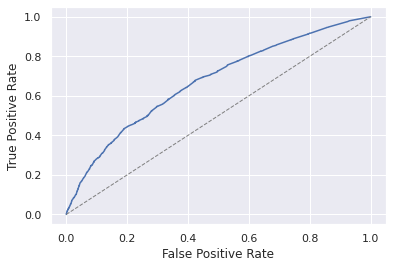

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d-%m-%Y %H:%M:%S') #Changed date to be separated by '-' instead of '/'
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour
    #print(hour)
    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'SCHEDULED_DEPARTURE': hour,
              'ORIGIN_AIRPORT_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_AIRPORT_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_AIRPORT_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_AIRPORT_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_AIRPORT_SEA': 1 if origin == 'SEA' else 0,
              'DEST_AIRPORT_ATL': 1 if destination == 'ATL' else 0,
              'DEST_AIRPORT_DTW': 1 if destination == 'DTW' else 0,
              'DEST_AIRPORT_JFK': 1 if destination == 'JFK' else 0,
              'DEST_AIRPORT_MSP': 1 if destination == 'MSP' else 0,
              'DEST_AIRPORT_SEA': 1 if destination == 'SEA' else 0 }]
    #print(pd.DataFrame(input).head())

    return model.predict_proba(pd.DataFrame(input))[0][0]

In [ ]:
predict_delay('6-02-2020 13:45:00', 'JFK', 'ATL')

0.45

In [ ]:
def convert(seconds): 
    seconds = seconds % (24 * 3600) 
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds) 
def predictMultipleDelaysFunc(departure_date, origin, destination) :
  from datetime import datetime
  date,month,year = map(int,departure_date.split('-'))
  dateTime = datetime(year,month,date)
  df_temp = df_original.loc[(df_original['MONTH'] == month) 
                             & (df_original['YEAR'] == year) 
                             & (df_original['DAY'] == date) 
                             & (df_original['ORIGIN_AIRPORT'] == origin)
                             & (df_original['DESTINATION_AIRPORT'] == destination),
                            ['MONTH','YEAR','DAY','ORIGIN_AIRPORT',
                             'DESTINATION_AIRPORT','AIRLINE','TAIL_NUMBER',
                             'FLIGHT_NUMBER','SCHEDULED_DEPARTURE']]
  myDict = {}
  smallDict = {}
  myDict['flights']=[]
  #print(df_temp)
  # TODO: Ayush - Write the block to get date time object from the df_temp 
  #       3 params - DateTime , origin and destination (get origin and dest 
  #                  from this method's args)
  #       Only date time along with Flight_Number, 
  for x in df_temp.index:
    month = df_temp['MONTH'][x]
    day = df_temp['DAY'][x]
    year = df_temp['YEAR'][x]
    dates = str(day)+'-'+str(month)+'-'+str(year)
    #time = convert(int(df_temp['SCHEDULED_DEPARTURE'][x]))
    time = str(df_temp['SCHEDULED_DEPARTURE'][x])
    minute = time[-2:]
    hour = time[:-2]
    time = hour+':'+minute+':'+'00'
    dateTime = str(dates)+' '+str(time)
    myDict['flights'].append({
        'airline' : '' + str(df_temp['AIRLINE'][x]) + ' ' 
            + str(df_temp['FLIGHT_NUMBER'][x]) + ' ' 
            + str(df_temp['TAIL_NUMBER'][x]),
        'delayPercentage' : 100 - 100 * predict_delay(dateTime, 
                                  df_temp['ORIGIN_AIRPORT'][x], 
                                  df_temp['DESTINATION_AIRPORT'][x])
    })
    # myDict['' + str(df_temp['AIRLINE'][x]) + ' ' 
    #        + str(df_temp['FLIGHT_NUMBER'][x]) + ' ' 
    #        + str(df_temp['TAIL_NUMBER'][x])] = 100 - 100 * predict_delay(dateTime, 
    #                                           df_temp['ORIGIN_AIRPORT'][x], 
    #                                           df_temp['DESTINATION_AIRPORT'][x])
  return myDict
    # print(predict_delay(dateTime, df_temp['ORIGIN_AIRPORT'][x], df_temp['DESTINATION_AIRPORT'][x]))
    # print(myDict)
predictMultipleDelaysFunc('21-02-2015','DTW','MSP')

{'flights': [{'airline': 'DL 52 N927AT', 'delayPercentage': 22.0},
  {'airline': 'DL 2393 N323NB', 'delayPercentage': 76.0},
  {'airline': 'DL 1476 N331NW', 'delayPercentage': 80.0},
  {'airline': 'DL 1055 N939DN', 'delayPercentage': 84.0}]}

(0.0, 1.0)

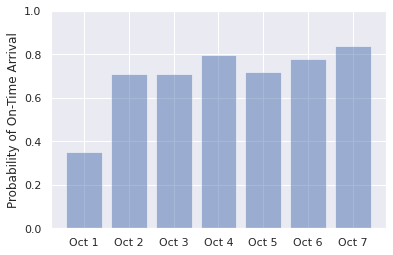

In [ ]:
import numpy as np

labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1-10-2020 21:45:00', 'JFK', 'ATL'),
          predict_delay('2-10-2020 21:45:00', 'JFK', 'ATL'),
          predict_delay('3-10-2020 21:45:00', 'JFK', 'ATL'),
          predict_delay('4-10-2020 21:45:00', 'JFK', 'ATL'),
          predict_delay('5-10-2020 21:45:00', 'JFK', 'ATL'),
          predict_delay('6-10-2020 21:45:00', 'JFK', 'ATL'),
          predict_delay('7-10-2020 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

In [ ]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask, request, redirect, url_for, jsonify
import json
app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run

@app.route("/")
def home():
  return "Hello from the other side :)"
@app.route("/getAccuracy")
@app.route("/dataSent")
def showDataReceived(name):
  return jsonify(name)
@app.route("/sendFormData", methods=['POST','GET'])
def getFormData():
  if request.method == 'POST' :
    dateTime = request.form['dateTime']
    origin = request.form['origin']
    destination = request.form['dest']
    
  if request.method == "GET" :
    dateTime = request.args.get('dateTime')
    origin = request.args.get('origin')
    destination = request.args.get('dest')
  return "The plane is going to be "+str(predict_delay(dateTime,origin,destination)*100)+"% on time"
  # TODO: only for web. return redirect(url_for("get_accuracy",dateTime=dateTime
  # ,origin=origin,destination=destination))
@app.route("/getMultipleDelays", methods=['POST','GET'])
def getMultipleDelays():
  if request.method == 'POST' :
    dateTime = request.form['dateTime']
    origin = request.form['origin']
    destination = request.form['dest']
  if request.method == "GET" :
    dateTime = request.args.get('dateTime')
    origin = request.args.get('origin')
    destination = request.args.get('dest')
  return json.dumps(predictMultipleDelaysFunc(dateTime, origin, destination))
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://9d402b23.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
